In [1]:
import math
import scipy.stats as st

import ipywidgets as widgets
from ipywidgets import interact

# Chapter 10: Hypothesis Testing with Two Samples

Studies often **compare two groups**.

For example, researchers are interested in the effect aspirin has in preventing heart attacks. Over the last few years, newspapers and magazines have reported various aspirin studies involving two groups. Typically, **one group** is given aspirin and **the other group** is given a placebo. _Then, the heart attack rate is studied over several years_.

Previously we learned to conduct hypothesis tests on single means and single proportions.

Now we compare two means or two proportions to each other.

To compare two means or two proportions, you work with two groups. The groups are classified either as independent or matched pairs.
* **Independent groups** consist of two samples that are independent, that is, sample values selected from one population are _not related in any way_ to sample values selected from the other population.
* **Matched pairs** consist of two samples that _are dependent_. The parameter tested using matched pairs is the population mean. The parameters tested using independent groups are either population means or population proportions.

---
This chapter deals with the following hypothesis tests:

**Independent groups (samples are independent)**
* Test of two population means.
* Test of two population proportions.

**Matched or paired samples (samples are dependent)**
* Test of the two population proportions by testing one population mean of differences.

## Two Population Means with Unknown Standard Deviations

1. The two independent samples are simple random samples from two distinct populations.
2. For the two distinct populations:
    * if the sample sizes are small, the distributions are important (should be normal)
    * if the sample sizes are large, the distributions are not important (need not be normal)
    
**Note**:
> The test comparing two independent population means with unknown and possibly unequal population standard deviations is called the Aspin-Welch t-test. The degrees of freedom formula was developed by Aspin-Welch.

A difference between the two samples depends on both the means and the standard deviations. Very different means can occur by chance if there is great variation among the individual samples. In order to account for the variation, we take the difference of the sample means, $\bar{X}_1 - \bar{X}_2$, and divide by the **standard error** in order to _standardize the difference_.  The result is a **t-score test statistic**.

Because we do not know the population standard deviations, we estimate them using the two sample standard deviations from our independent samples. For the hypothesis test, we calculate the estimated standard deviation, or **standard error**, of **the difference in sample means**, $\bar{X}_1 - \bar{X}_2$.

**The standard error is**:
* $\sqrt{\frac{(s_1)^2}{n_1} + \frac{(s_2)^2}{n_2}}$

The test statistic (**t-score**) is calculated as follows:
* $\frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{(s_1)^2}{n_1} + \frac{(s_2)^2}{n_2}}}$

**where**:
* $s_1$ and $s_2$, the sample standard deviations, are estimates of $\sigma_1$ and $\sigma_2$ respectively.
* $\sigma_1$ and $\sigma_2$ are the unknown population standard deviations.
* $\bar{x}_1$ and $\bar{x}_2$ are the sample means.  $\sigma_1$ and $\sigma_2$ are the population means.

The number of **degrees of freedom (df)** requires a somewhat complicated calculation. However, a computer or calculator calculates it easily. The df are not always a whole number. The test statistic calculated previously is approximated by the Student's t-distribution with df as follows:

**Degrees of freedom**
* $df = \frac{\bigl( \frac{(s_1)^2}{n_1} + \frac{(s_2)^2}{n_2} \bigr)^2}
{\bigl(\frac{1}{n_1-1}\bigr)\bigl(\frac{(s_1)^2}{n_1}\bigr)^2 + \bigl(\frac{1}{n_2-1}\bigr)\bigl(\frac{(s_2)^2}{n_2}\bigr)^2}$

When both sample sizes $n_1$ and $n_2$ are five or larger, the Student's t approximation is very good. Notice that the sample variances $(s_1)^2$ and $(s2)^2$ are not pooled. (If the question comes up, do not pool the variances.)

<span style="color:red">Example 10.1</span>

**Independent groups**

The average amount of time boys and girls aged seven to 11 spend playing sports each day is believed to be the same. A study is done and data are collected, resulting in the data in Table 10.1. Each populations has a normal distribution.

||**Sample Size**|**Average Number of Hours Playing Sports Per Day**|**Sample Standard Deviation**|
|--|--|--|--|
|Girls|9|2|0.866|
|Boys|16|3.2|1.00|
Table 10.1

Is there a difference in the mean amount of time boys and girls aged seven to 11 play sports each day? Test at the 5% level of significance.

**The population standard deviations are not known**. Let g be the subscript for girls and b be the subscript for boys. Then,
* $\mu_g$ is the population mean for girls and
* $\mu_b$ is the population mean for boys.
* This is a test of two **independent groups**, two population **means**.

**Random variable**: $\bar{X}_g - \bar{X}_b$ = difference int he sample mean amount of time girls and boys play sports each day.
* $H_0: \mu_g = \mu_b$, $H_0:\mu_g-\mu_b = 0$
* $H_a: \mu_g \ne \mu_b$, $H_a: \mu_g - \mu_b \ne 0$

The words "**the same**" tell you $H_0$ has an "=". Since there are no other words to indicate $H_a$, assume it says "**is different**." This is a two-tailed test.

**Distribution for the test**: Use $t_df$ where df is calculated using the $df$ formula for independent groups, two population means. Using a calculator, $df$ is approximately 18.8462. Do not pool the variances.

In [2]:
# calculate the df
((0.866**2)/9 + (1**2)/16)**2/ \
(1/(9-1)*((0.866**2)/9)**2 + (1/(16-1)*((1**2)/16)**2))

18.84659125336577

In [3]:
# t-score using two means formula
((2 - 3.2) - (0.866 - 1))/ \
math.sqrt(((0.866**2)/9) + ((1**2)/16))

-2.791490042981217

In [4]:
# equal_var=False since the instructions said "Do not pool the variances."
st.ttest_ind_from_stats(2, 0.866, 9, 3.2, 1.00, 16, equal_var=False)

Ttest_indResult(statistic=-3.1423902922865476, pvalue=0.005401921297382211)

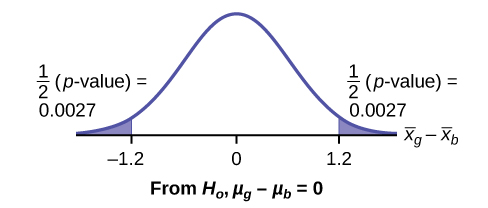

In [5]:
0.0054/2

0.0027

* $s_g = 0.866$
* $s_b = 1$
* So, $\bar{x}_g - \bar{x}_b = 2 - 3.2 = -1.2$
* Half the $p$-value is below -1.2 and half is above 1.2

**Make a decision**: Since $\alpha \gt p$-value, reject $H_0$. This means you reject $\mu_g=\mu_b$. The means are different.

**Conclusion**: At the 5% level of significance, the sample data show there is sufficient evidence to conclude that the mean number of hours that girls and boys aged seven to 11 play sports per day is different (mean number of hours boys aged seven to 11 play sports per day is greater than the mean number of hours played by girls OR the mean number of hours girls aged seven to 11 play sports per day is greater than the mean number of hours played by boys).

<span style="color:orange">Example 10.2</span>

A study is done by a community group in two neighboring colleges to determine which one graduates students with more math classes. College A samples 11 graduates. Their average is four math classes with a standard deviation of 1.5 math classes. College B samples nine graduates. Their average is 3.5 math classes with a standard deviation of one math class. The community group believes that a student who graduates from college A **has taken more math classes**, on the average. Both populations have a normal distribution. Test at a 1% significance level. Answer the following questions.